<a href="https://colab.research.google.com/github/ThOpaque/Food_Recognition/blob/main/get_annotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob
import numpy as np
import random as rd

import PIL

import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
label_names = {0:'Assiette', 1:'Entree', 2:'Pain', 3:'Boisson', 4:'Yaourt', 5:'Dessert', 6:'Fruit', 7:'Fromage'}
path = r"/Users/thierryksstentini/Documents/Python_divers/GitHub/Food_Recognition/YoloV1_Compagny_MealTrays/mealtrays_dataset/obj_train_data"
data_txt = glob.glob(path + '/*.txt')
data_img = glob.glob(path + '/*.jpg')

In [3]:
annotations = {}
for file in data_txt:
    obj_list = []
    with open(file, 'r') as f:
        line_list = f.readline()
        while len(line_list) != 0:
            line_list = [float(k) for k in line_list.split()]
            label = int(line_list[0])
            line_list[0] = label
            line_list.insert(0, label_names.get(label))
            
            obj_list.append(line_list)
            line_list = f.readline()

        if obj_list:
            start = file.rfind('/')+1
            end = file.rfind('.txt')
            key = file[start : end]
            annotations[key] = obj_list

In [4]:
import torch
import numpy 
torch.Tensor([0.5]).ceil(), np.ceil(0.5)

(tensor([1.]), 1.0)

In [301]:
import torchvision
def plot_bboxes(annotations, img_name, path, ext):
    color_list = {'Assiette':'b', 'Entree':'g', 'Pain':'r', 'Boisson':'c', 
                'Yaourt':'w', 'Dessert':'k', 'Fruit':'m', 'Fromage':'y'}
    
    # torch.manual_seed(10)
    annotations_idx = annotations[img_name]
    img_idx = PIL.Image.open(path + '/' + img_name + ext).convert('RGB')
    img_idx = img_idx.resize((448,448), PIL.Image.Resampling.BICUBIC)

    crop_infos = torchvision.transforms.RandomCrop.get_params(img_idx, (380,380))
    img_idx = torchvision.transforms.functional.crop(img_idx, *crop_infos)

    print(crop_infos)

    # img_idx = img_idx.transpose(PIL.Image.FLIP_TOP_BOTTOM)
    # img_idx = img_idx.Transpose.FLIP_LEFT_RIGHT
    img_W = img_idx.size[0]
    img_H = img_idx.size[1]

    fig, ax = plt.subplots()
    ax.imshow(img_idx)
    ax.set_xticks = []
    ax.set_yticks = []

    for label_infos in annotations_idx:
        label_name = label_infos[0]
        label_id = label_infos[1]

        ### Get relative positions
        cx = label_infos[2]
        cy = label_infos[3]
        rw = label_infos[4]
        rh = label_infos[5]
        
        ### Create absolute positions        
        img_W = 448
        img_H = 448

        cx_abs = img_W * cx
        cy_abs = img_H * cy

        cx_abs, cy_abs = cx_abs-crop_infos[1], cy_abs-crop_infos[0]

        x = cx_abs - (img_W * (rw/2)) 
        y = cy_abs - (img_H * (rh/2))

        x,y = int(x), int(y)

        ### Create absolute width and height
        w = img_W * rw
        h = img_H * rh

        print(x, y)
        
        ### Plot part
        if (x>=0 and y>=0) and (x<=300 and y<=300) :
            color = color_list.get(label_name)
            rect = patches.Rectangle((x, y), w, h, facecolor='none', edgecolor=color)
            ax.add_patch(rect)

            offset_x = 2
            offset_y = 30
            ax.text(x+offset_x, y+offset_y, label_name, fontsize=8, color=color, family='monospace', weight='bold')

    plt.show()

(40, 22, 380, 380)
154 123
55 169
26 240


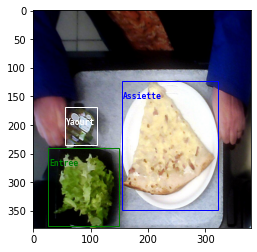

In [316]:
keys = list(annotations.keys())
key = rd.choice(keys)
img_name = key
plot_bboxes(annotations, img_name, path, '.jpg')